# Loading Packages

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings  
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
df=pd.read_csv("P:\Drive\_CAPSTONE_dataset\XYZCorp_LendingData(1).txt", low_memory = False, delimiter="\t")

# Understanding the Data

In [3]:
df.shape

(855969, 73)

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

Text(0, 0.5, 'Data type')

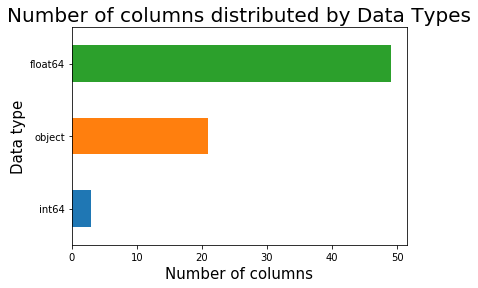

In [5]:
# Number of each type of variable
df.dtypes.value_counts().sort_values().plot(kind='barh')
plt.title('Number of columns distributed by Data Types',fontsize=20)
plt.xlabel('Number of columns',fontsize=15)
plt.ylabel('Data type',fontsize=15)

# Missing Value Analysis and Treatment

In [6]:
df.isnull().sum()
#df.isnull().sum(axis = 0)

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
desc                           734157
purpose                             0
title                              33
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_l

In [7]:
# To view properly, we will sort the missing values in descending order.

mis_val = df.isnull().sum() # Missing values
mis_val_percent = 100 * df.isnull().sum() / len(df) # Percentage of missing values
var_dtypes = df.dtypes # Dtypes of variables

#Concatnating into one table
mis_val_table = pd.concat([mis_val, mis_val_percent, var_dtypes], axis = 1)

# Renaming the three variables
mis_val_table = mis_val_table.rename(columns = {0: 'Missing values', 1: '% of Total Values', 2: 'Dtype'})

# Selecting only those variables who have missing values greater than 0% and sorting them in descending order
mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values',ascending = False)

print(mis_val_table)

                             Missing values  % of Total Values    Dtype
dti_joint                            855529          99.948596  float64
annual_inc_joint                     855527          99.948363  float64
verification_status_joint            855527          99.948363   object
il_util                              844360          98.643759  float64
mths_since_rcnt_il                   843035          98.488964  float64
inq_last_12m                         842681          98.447607  float64
open_il_24m                          842681          98.447607  float64
open_il_12m                          842681          98.447607  float64
open_il_6m                           842681          98.447607  float64
open_acc_6m                          842681          98.447607  float64
open_rv_12m                          842681          98.447607  float64
open_rv_24m                          842681          98.447607  float64
total_bal_il                         842681          98.447607  

In [8]:
print('There are in all', mis_val_table.shape[0], 'variables with missing values!')

There are in all 32 variables with missing values!


In [9]:
# Let's drop all variables with missing data above 90% as we do not have sufficient data to draw any insights from.

df = df.loc[:, ((df.isnull().sum()/len(df)) < 0.9)]
print(df.shape)

(855969, 56)


## Treating object variables with missing values

In [10]:
# We will check the number of unique values of desc, emp_title, emp_length, and title varaibles

print('N.o of unique values of desc variable:',len(df.desc.unique().tolist()))
print('N.o of unique values of emp_title variable:',len(df.emp_title.unique().tolist()))
print('N.o of unique values of emp_length variable:',len(df.emp_length.unique().tolist()))
print('N.o of unique values of title variable:',len(df.title.unique().tolist()))

N.o of unique values of desc variable: 120336
N.o of unique values of emp_title variable: 290913
N.o of unique values of emp_length variable: 12
N.o of unique values of title variable: 60992


In [11]:
df = df.drop(['desc','emp_title','title'], axis = 1)
print(df.shape)

(855969, 53)


In [12]:
# Let's look at the unique values of the emp_length varaible.

print(df.emp_length.unique())

['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]


In [13]:
df['emp_length'].isnull().sum()

43061

In [14]:
# As seen above, we cannot lose the observations with null values for the variable emp_length.
# Let's impute missing values with 0 assuming that the borrower hasn't worked many years for his data to be recorded.

df['emp_length'].fillna(value=0,inplace=True)

### Treating the date variables with missing values

In [15]:
print(df.next_pymnt_d.value_counts().head(10), '\n')
print(df.last_pymnt_d.value_counts().head(10), '\n')
print(df.last_credit_pull_d.value_counts().head(10), '\n')

Feb-2016    534094
Jan-2016     68838
Mar-2016        66
Name: next_pymnt_d, dtype: int64 

Jan-2016    467510
Dec-2015    142783
Jul-2015     14472
Aug-2015     13010
Oct-2015     12503
Jun-2015     11977
Sep-2015     11448
Apr-2015     11102
May-2015     11065
Mar-2015     10755
Name: last_pymnt_d, dtype: int64 

Jan-2016    701687
Dec-2015     19039
Nov-2015     11388
Oct-2015     10290
Sep-2015      9985
Jul-2015      8603
Aug-2015      7942
Jun-2015      7090
Apr-2015      6126
May-2015      5899
Name: last_credit_pull_d, dtype: int64 



As we observe here,
1. All the three date values have month and year values but not day values.
2. The next_payment_d variable has only 3 unique values, hence backfilling the date will not affect the variation in our data.
3. We can also impute the last_pymnt_d and last_credit_pull_d variables with back dates as their missing-value percentage is small.

In [16]:
# Let's do a backfill for these dates

df.next_pymnt_d.fillna(method = 'bfill', inplace = True)
df.last_pymnt_d.fillna(method = 'bfill', inplace = True)
df.last_credit_pull_d.fillna(method = 'bfill', inplace = True)

## Treating numeric variables with missing values

In [17]:
# Removing variables with 85% and 75% missing variables respectively, as they do not have 
# enough information to explain the variation in data.

df = df.drop(['mths_since_last_record', 'mths_since_last_major_derog'], axis = 1)

In [18]:
# Let's imput the remaining numeric variables with their respective median values.

df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(), inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(), inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(), inplace=True)
df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(), inplace=True)
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(), inplace=True)

In [19]:
df.shape

(855969, 51)

In [20]:
# To view properly, we will sort the missing values in descending order.

mis_val = df.isnull().sum() # Missing values
mis_val_percent = 100 * df.isnull().sum() / len(df) # Percentage of missing values
var_dtypes = df.dtypes # Dtypes of variables

#Concatnating into one table
mis_val_table = pd.concat([mis_val, mis_val_percent, var_dtypes], axis = 1)

# Renaming the three variables
mis_val_table = mis_val_table.rename(columns = {0: 'Missing values', 1: '% of Total Values', 2: 'Dtype'})

# Selecting only those variables who have missing values greater than 0% and sorting them in descending order
mis_val_table = mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values('% of Total Values',ascending = False)

print(mis_val_table)

Empty DataFrame
Columns: [Missing values, % of Total Values, Dtype]
Index: []


# Feature Engineering

In [21]:
# Drop columns with just one value or all unknown
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df.drop(columns = cols_to_drop, inplace=True)

In [22]:
# Let's drop id and member_id variables.

df = df.drop(['id','member_id'], axis = 1)
print(df.shape)

(855969, 48)


In [23]:
# Let's check the unique values of the object variables.
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                     2
grade                    7
sub_grade               35
emp_length              12
home_ownership           6
verification_status      3
issue_d                103
pymnt_plan               2
purpose                 14
zip_code               931
addr_state              51
earliest_cr_line       697
initial_list_status      2
last_pymnt_d            97
next_pymnt_d             3
last_credit_pull_d     102
application_type         2
dtype: int64

In [24]:
# Let's drop zip_code as it contain text that cannot be encoded due to large number of distinct alues.

df = df.drop(['zip_code'], axis = 1)

In [25]:
print(df.shape)

(855969, 47)


## Handling the date variables

In [26]:
# Converting the date object columns into datetime format.
# The following 5 lines of code take some time to run. Approximately 2 minutes each.

df['issue_d']= pd.to_datetime(df['issue_d'])

In [27]:
df['last_pymnt_d']= pd.to_datetime(df['last_pymnt_d'])

In [28]:
df['last_credit_pull_d']= pd.to_datetime(df['last_credit_pull_d'])

In [29]:
df['earliest_cr_line']= pd.to_datetime(df['earliest_cr_line'])

In [30]:
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])

In [31]:
# Let's check the values of earliest_cr_line variable.

print(df.earliest_cr_line.value_counts().head(10))

2001-08-01    6433
2000-08-01    6322
2000-10-01    6117
2001-10-01    5924
2002-08-01    5858
2000-09-01    5712
1999-11-01    5654
1999-10-01    5630
2000-11-01    5610
2002-09-01    5604
Name: earliest_cr_line, dtype: int64


In [32]:
# Now let's transform the date variables and assign some weights to them.
# The best way to assign weights to the dates would be to add the year and months present in them.

df['last_pymnt_d'] = df['last_pymnt_d'].apply(lambda x: (int(x.strftime('%Y'))) + (int(x.strftime('%m'))))
df['last_credit_pull_d'] = df['last_credit_pull_d'].apply(lambda x: (int(x.strftime('%Y'))) + (int(x.strftime('%m'))))
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: (int(x.strftime('%Y'))) + (int(x.strftime('%m'))))
df['next_pymnt_d'] = df['next_pymnt_d'].apply(lambda x: (int(x.strftime('%Y'))) + (int(x.strftime('%m'))))

# Exploratory Data Analysis (EDA)

In [33]:
# Let's check the unique values of some float variables.
df.select_dtypes('float64').apply(pd.Series.nunique, axis = 0).sort_values(ascending = True).head(30)

acc_now_delinq                     8
inq_last_6mths                     9
collections_12_mths_ex_med        12
delinq_2yrs                       29
pub_rec                           31
open_acc                          77
total_acc                        134
mths_since_last_delinq           155
int_rate                         520
revol_util                      1338
loan_amnt                       1368
funded_amnt                     1368
dti                             4074
total_rec_late_fee              5386
funded_amnt_inv                 8818
tot_coll_amt                   10138
collection_recovery_fee        20529
total_rev_hi_lim               20793
recoveries                     22627
annual_inc                     48163
installment                    67349
revol_bal                      72779
last_pymnt_amnt               230321
out_prncp                     236739
total_rec_prncp               250385
out_prncp_inv                 254328
total_rec_int                 317683
t

In [34]:
# Let's check the unique values of the object variables.
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

term                    2
grade                   7
sub_grade              35
emp_length             12
home_ownership          6
verification_status     3
pymnt_plan              2
purpose                14
addr_state             51
initial_list_status     2
application_type        2
dtype: int64

## Univariate Analysis

<Figure size 432x288 with 0 Axes>

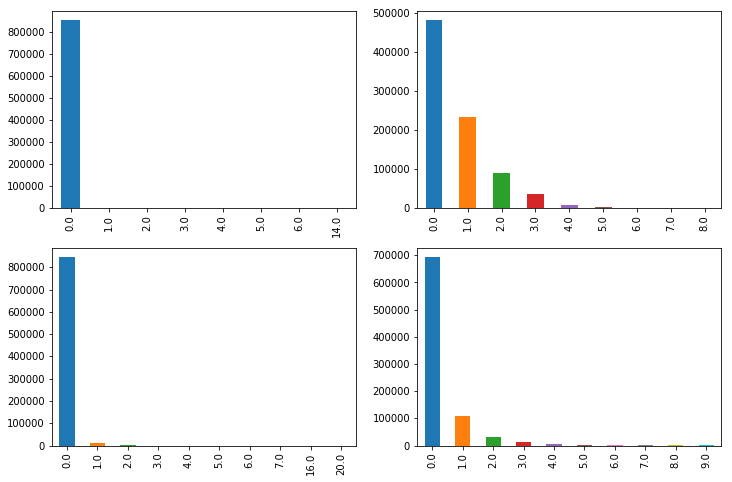

In [35]:
fig = plt.figure()
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
df['acc_now_delinq'].value_counts().head(10).plot.bar()

plt.subplot(2, 2, 2)
df['inq_last_6mths'].value_counts().head(10).plot.bar()

plt.subplot(2, 2, 3)
df['collections_12_mths_ex_med'].value_counts().head(10).plot.bar()

plt.subplot(2, 2, 4)
df['delinq_2yrs'].value_counts().head(10).plot.bar()

plt.show()

<Figure size 432x288 with 0 Axes>

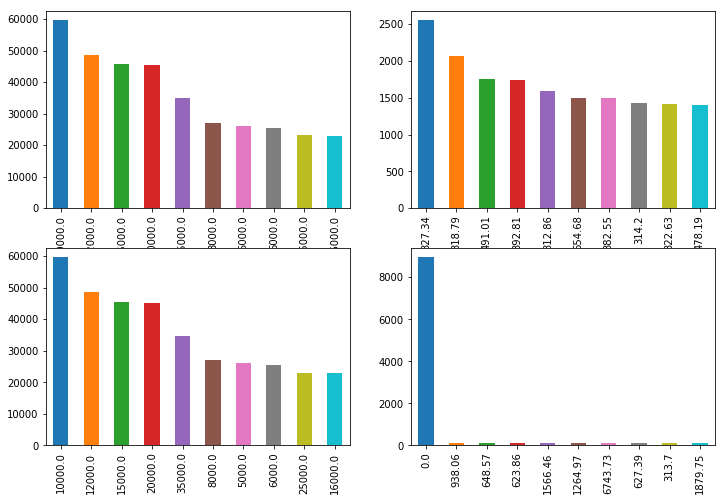

In [36]:
fig = plt.figure()
plt.figure(figsize=(12,8))

plt.subplot(2, 2, 1)
df['loan_amnt'].value_counts().head(10).plot.bar()

plt.subplot(2, 2, 2)
df['installment'].value_counts().head(10).plot.bar()

plt.subplot(2, 2, 3)
df['funded_amnt'].value_counts().head(10).plot.bar()

plt.subplot(2, 2, 4)
df['total_pymnt'].value_counts().head(10).plot.bar()

plt.show()

## Bivariate Analysis

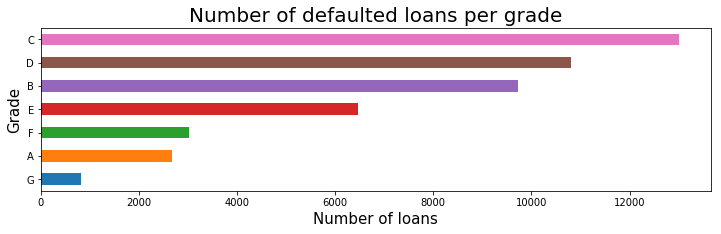

In [37]:
# Which grade has most number of defaulted loans?
fig = plt.figure(figsize=(12,3))
df[df['default_ind']==1].groupby('grade')['default_ind'].count().sort_values().plot(kind='barh')
plt.ylabel('Grade',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per grade',fontsize=20);

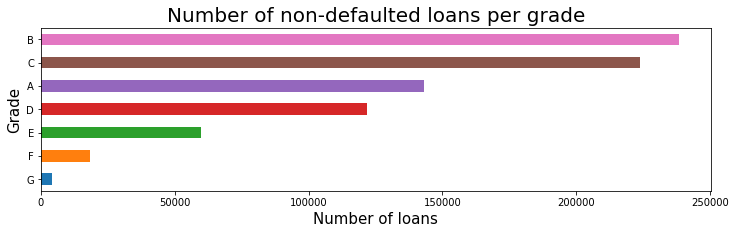

In [38]:
# Which grade has most number of non-defaulted loans?
fig = plt.figure(figsize=(12,3))
df[df['default_ind']==0].groupby('grade')['default_ind'].count().sort_values().plot(kind='barh')
plt.ylabel('Grade',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of non-defaulted loans per grade',fontsize=20);

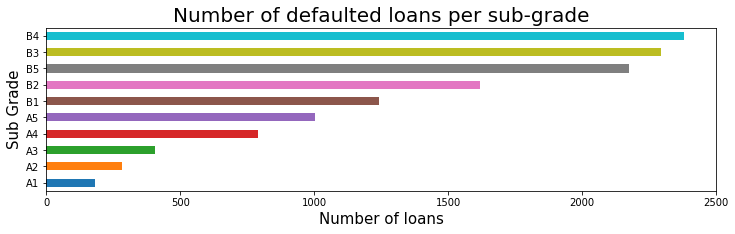

In [39]:
# Which sub_grade has most number of defaulted loans?
fig = plt.figure(figsize=(12,3))
df[df['default_ind']==1].groupby('sub_grade')['default_ind'].count().head(10).sort_values().plot(kind='barh')
plt.ylabel('Sub Grade',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per sub-grade',fontsize=20);

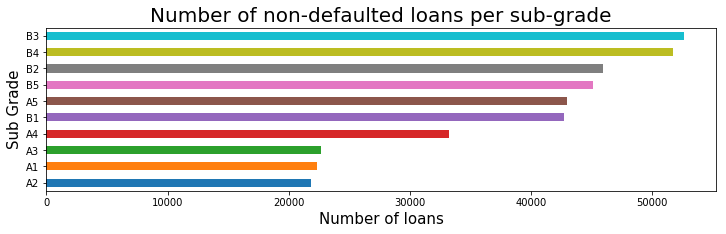

In [40]:
# Which sub_grade has most number of non-defaulted loans?
fig = plt.figure(figsize=(12,3))
df[df['default_ind']==0].groupby('sub_grade')['default_ind'].count().head(10).sort_values().plot(kind='barh')
plt.ylabel('Sub Grade',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of non-defaulted loans per sub-grade',fontsize=20);

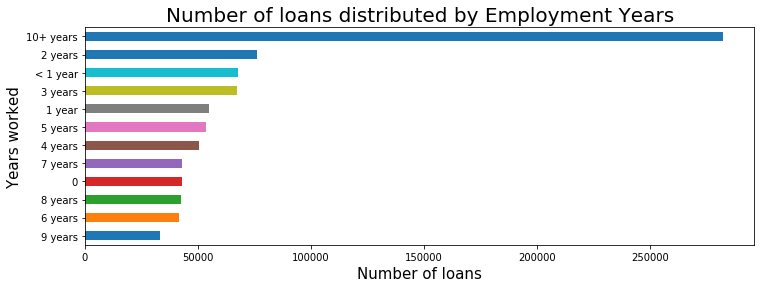

In [41]:
# Let's see how employee length affects the total number of loan applications received by XYZ Corp.

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(12,4))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

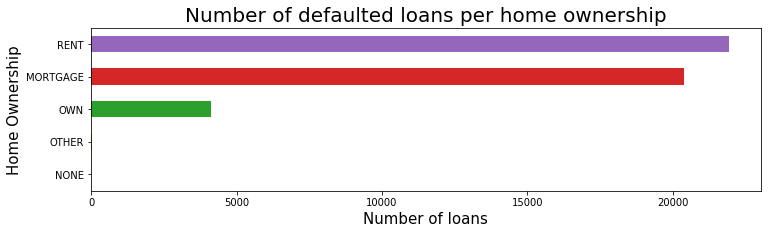

In [42]:
# Which home_ownership has most number of defaulted loans?
fig = plt.figure(figsize=(12,3))
df[df['default_ind']==1].groupby('home_ownership')['default_ind'].count().sort_values().plot(kind='barh')
plt.ylabel('Home Ownership',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per home ownership',fontsize=20);

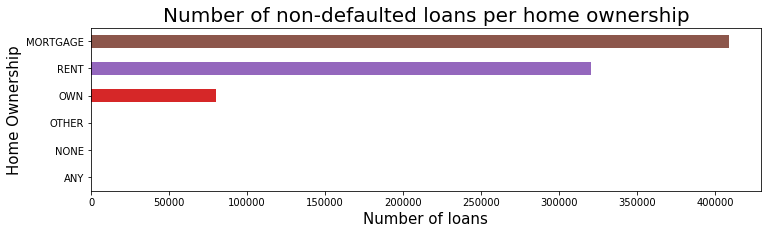

In [43]:
# Which home_ownership has most number of non-defaulted loans?
fig = plt.figure(figsize=(12,3))
df[df['default_ind']==0].groupby('home_ownership')['default_ind'].count().sort_values().plot(kind='barh')
plt.ylabel('Home Ownership',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of non-defaulted loans per home ownership',fontsize=20);

In [44]:
df.home_ownership.value_counts()

MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64

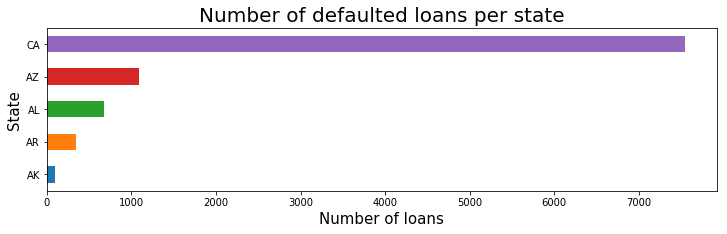

In [45]:
# Which state has most number of defaulted loans?

fig = plt.figure(figsize=(12,3))
df[df['default_ind']==1].groupby('addr_state')['default_ind'].count().head(5).sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

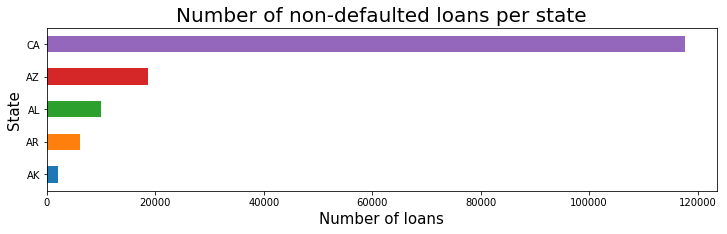

In [46]:
# Which state has most number of non-defaulted loans?

fig = plt.figure(figsize=(12,3))
df[df['default_ind']==0].groupby('addr_state')['default_ind'].count().head(5).sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of non-defaulted loans per state',fontsize=20);

## Multivariate Analysis

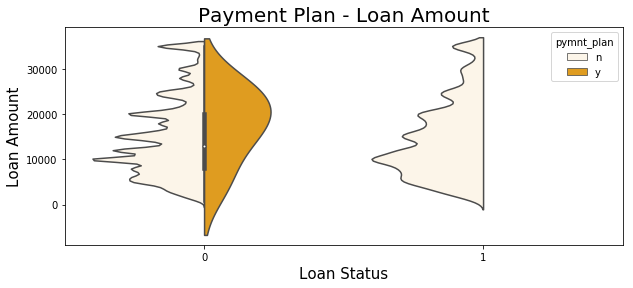

In [47]:
# Let's check distribution of pymnt_plan in our loan amount with respect to loan status.

fig = plt.figure(figsize=(10,4))
sns.violinplot(x="default_ind",y="loan_amnt",data=df, hue="pymnt_plan", split=True,color='orange')
plt.title("Payment Plan - Loan Amount", fontsize=20)
plt.xlabel("Loan Status", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [48]:
df['pymnt_plan'].value_counts()

n    855964
y         5
Name: pymnt_plan, dtype: int64

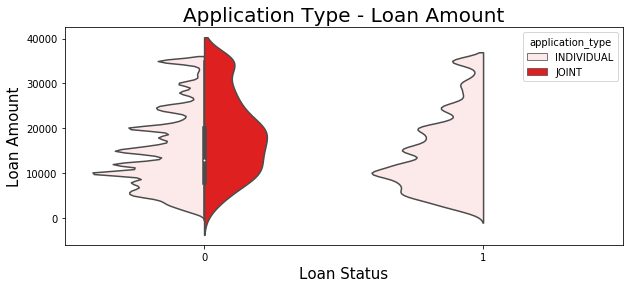

In [49]:
# Let's check distribution of application_type in our loan amount with respect to loan status.

fig = plt.figure(figsize=(10,4))
sns.violinplot(x="default_ind",y="loan_amnt",data=df, hue="application_type", split=True,color='red')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("Loan Status", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

In [50]:
df['application_type'].value_counts()

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64

## Dimensionality Reduction

In [51]:
df_new = df.copy() # Creating a backup of the dataframe

In [52]:
#df = df_new.copy()

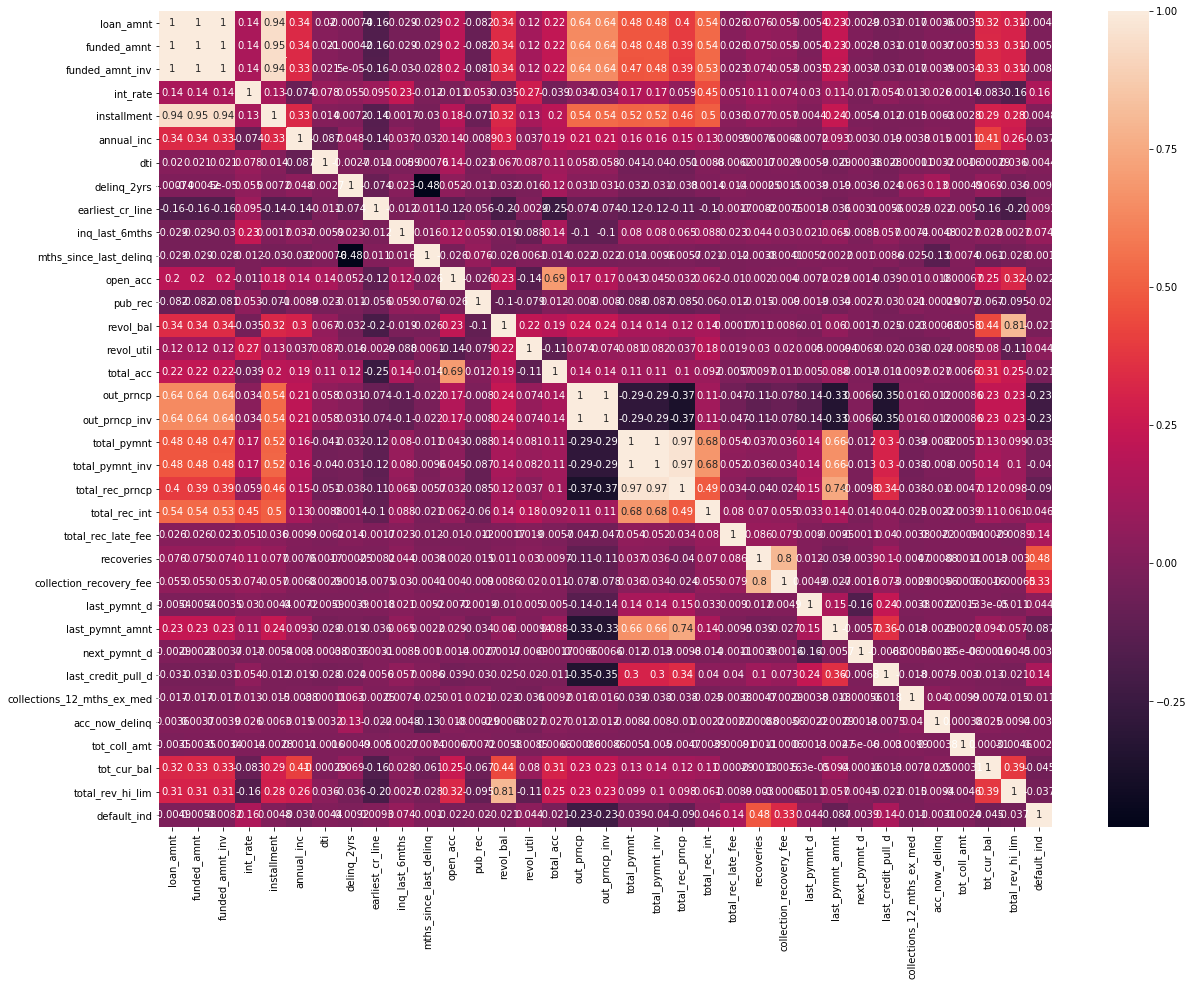

In [53]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
            annot = True, annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [54]:
df.corr()['funded_amnt'].sort_values().tail(6)

out_prncp          0.641706
out_prncp_inv      0.641709
installment        0.945903
funded_amnt_inv    0.998485
loan_amnt          0.999265
funded_amnt        1.000000
Name: funded_amnt, dtype: float64

In [55]:
df = df.drop(['loan_amnt', 'funded_amnt_inv', 'installment'], axis = 1)
df = df.drop(['out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp'], axis = 1)

In [56]:
print(df.shape) # 41 variables

(855969, 41)


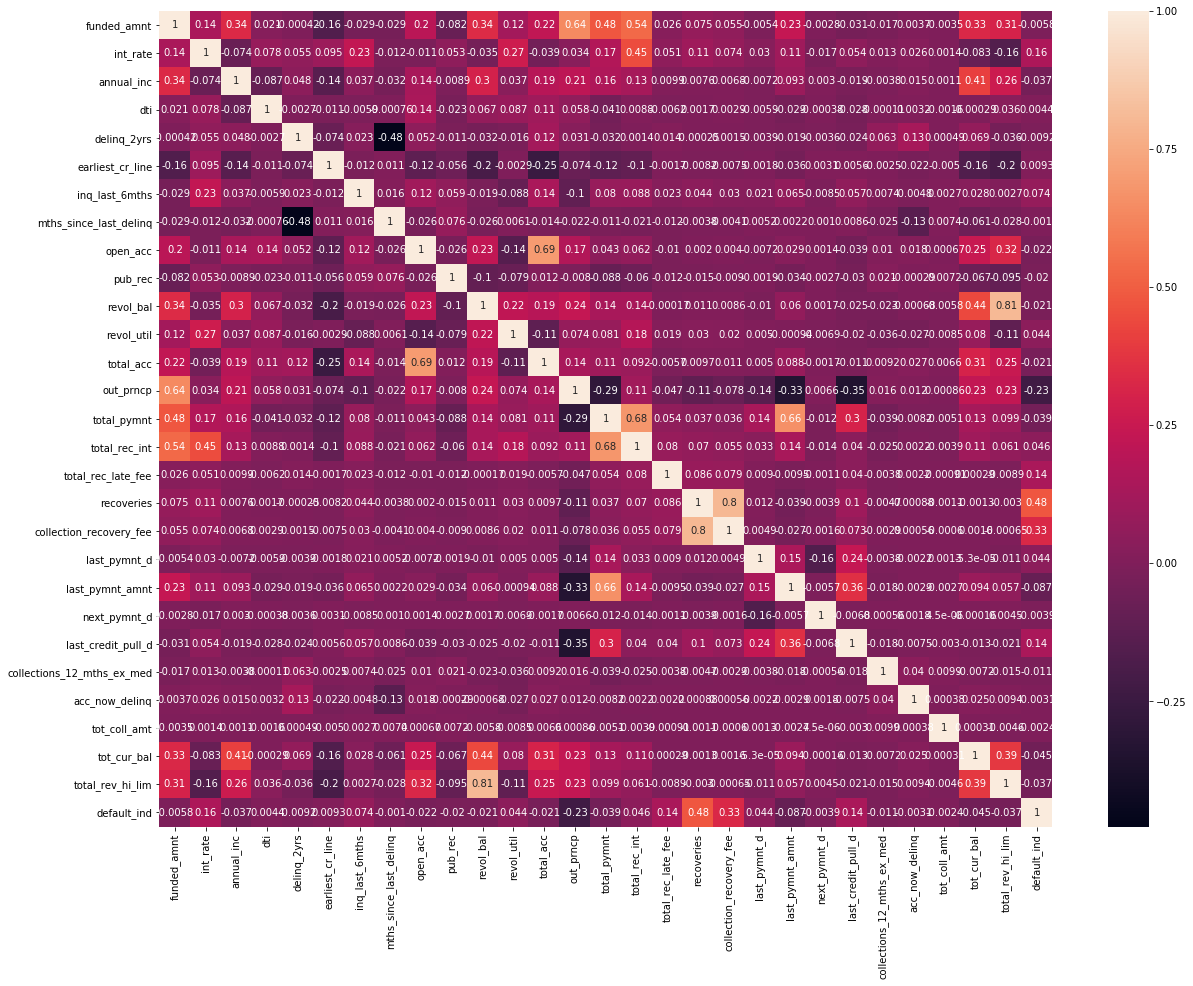

In [57]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, 
            annot = True, annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Data Transformation and Preparation

## Label encoding

In [58]:
# Label encoding variables with binomial values

from sklearn import preprocessing

count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) == 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)



term
pymnt_plan
initial_list_status
application_type
4 columns were label encoded.


In [59]:
# Let's check the unique values of the object variables.
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

grade                   7
sub_grade              35
emp_length             12
home_ownership          6
verification_status     3
purpose                14
addr_state             51
dtype: int64

## One-hot encoding

In [60]:
df = pd.get_dummies(df)
print(df.shape)

(855969, 162)


In [61]:
# Let's check the unique values of the object variables.
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Series([], dtype: float64)

## Splitting data into train and test

In [62]:
train = df[df['issue_d'] < '2015-06-01']
test = df[df['issue_d'] >= '2015-06-01']

In [63]:
print(train.shape)
print(test.shape)

(598978, 162)
(256991, 162)


In [64]:
train['issue_d'] = train['issue_d'].apply(lambda x: (int(x.strftime('%Y'))) + (int(x.strftime('%m'))))
test['issue_d'] = test['issue_d'].apply(lambda x: (int(x.strftime('%Y'))) + (int(x.strftime('%m'))))

In [65]:
train['default_ind'].value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [66]:
X_train = train.drop(['default_ind'], axis =1)
y_train = train['default_ind']

X_test = test.drop(['default_ind'], axis = 1)
y_test = test['default_ind']

In [67]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(598978, 161)
(598978,)
(256991, 161)
(256991,)


# Building Models

## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train, y=y_train)

y_predict = logisticRegr.predict(X_test)

print ("\nLogistic accuracy is %2.2f" % accuracy_score(y_test,y_predict))
print('\n',classification_report(y_test, y_predict))
print('\n',confusion_matrix(y_test, y_predict))


Logistic accuracy is 1.00

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.86      0.80      0.83       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991


 [[256641     39]
 [    63    248]]


The area under the curve is 90.79 %


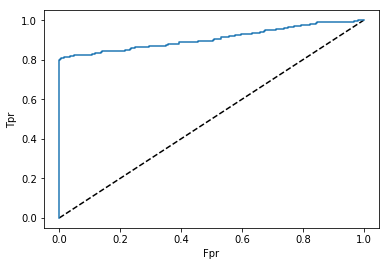

In [69]:
#plotting the roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = logisticRegr.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')
print('The area under the curve is',(roc_auc_score(y_test,y_pred_prob)*100).round(2),'%')

## Decision Tree

In [70]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 50)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print ("Decision tree accuracy is %2.2f" % accuracy_score(y_test,y_predict))
print('\n',classification_report(y_test, y_predict))
print('\n',confusion_matrix(y_test, y_predict))

Decision tree accuracy is 1.00

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.97      0.96      0.97       311

   micro avg       1.00      1.00      1.00    256991
   macro avg       0.98      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991


 [[256670     10]
 [    11    300]]


## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1)

rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print ("Random forest accuracy is %2.2f" % accuracy_score(y_test,y_predict))
print('\n',classification_report(y_test, y_predict))
print('\n',confusion_matrix(y_test, y_predict))

Random forest accuracy is 0.98

               precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.95      0.09       311

   micro avg       0.98      0.98      0.98    256991
   macro avg       0.52      0.96      0.54    256991
weighted avg       1.00      0.98      0.99    256991


 [[250722   5958]
 [    15    296]]


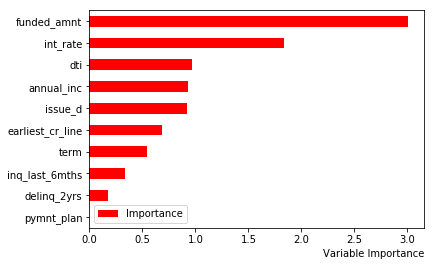

In [72]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index = X_train.columns)
Importance.head(10).sort_values('Importance', axis=0,ascending=True).plot(kind='barh',color='r',)
plt.xlabel('Variable Importance', horizontalalignment='right', position=(1,25))
plt.gca().Legend_ = None

In [73]:
train_copy = train.copy() # Backup of train data
test_copy = test.copy() # Backup of test data

In [74]:
print(train['default_ind'].value_counts())
print(test['default_ind'].value_counts())

0    552822
1     46156
Name: default_ind, dtype: int64
0    256680
1       311
Name: default_ind, dtype: int64


# Handling Imbalanced Data (Upsampling)

In [75]:
from sklearn.utils import resample

train_majority = train[train['default_ind']==0]
train_minority = train[train['default_ind']==1]

train_minority_upsampled = resample(train_minority,
replace=True,
n_samples=552822, #same number of samples as majority class
random_state=1) #set the seed for random resampling
# Combine resampled results
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

print(train_upsampled['default_ind'].value_counts())

1    552822
0    552822
Name: default_ind, dtype: int64


In [76]:
# Doing the same for test data

In [77]:
test_majority = test[test['default_ind']==0]
test_minority = test[test['default_ind']==1]

test_minority_upsampled = resample(test_minority,
replace=True,
n_samples=256680, #same number of samples as majority class
random_state=1) #set the seed for random resampling
# Combine resampled results
test_upsampled = pd.concat([test_majority, test_minority_upsampled])

print(test_upsampled['default_ind'].value_counts())

1    256680
0    256680
Name: default_ind, dtype: int64


In [78]:
train = train_upsampled.copy()
test = test_upsampled.copy()

In [79]:
X_train = train.drop(['default_ind'], axis =1)
y_train = train['default_ind']

X_test = test.drop(['default_ind'], axis = 1)
y_test = test['default_ind']

In [80]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1105644, 161)
(1105644,)
(513360, 161)
(513360,)


## Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(X=X_train, y=y_train)

y_predict = logisticRegr.predict(X_test)

print ("\nLogistic accuracy is %2.2f" % accuracy_score(y_test,y_predict))
print('\n',classification_report(y_test, y_predict))
print('\n',confusion_matrix(y_test, y_predict))


Logistic accuracy is 0.90

               precision    recall  f1-score   support

           0       0.83      1.00      0.91    256680
           1       1.00      0.80      0.89    256680

   micro avg       0.90      0.90      0.90    513360
   macro avg       0.92      0.90      0.90    513360
weighted avg       0.92      0.90      0.90    513360


 [[256564    116]
 [ 52027 204653]]


## Plotting the ROC Curve

The area under the curve is 92.6 %


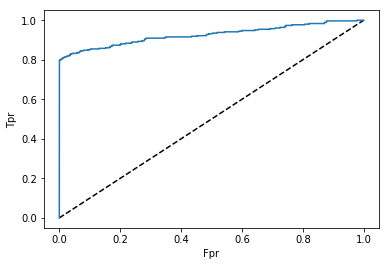

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob = logisticRegr.predict_proba(X_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')
print('The area under the curve is',(roc_auc_score(y_test,y_pred_prob)*100).round(2),'%')

## Decision Tree

In [83]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 50)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print ("Decision tree accuracy is %2.2f" % accuracy_score(y_test,y_predict))
print('\n',classification_report(y_test, y_predict))
print('\n',confusion_matrix(y_test, y_predict))

Decision tree accuracy is 0.98

               precision    recall  f1-score   support

           0       0.97      1.00      0.98    256680
           1       1.00      0.97      0.98    256680

   micro avg       0.98      0.98      0.98    513360
   macro avg       0.98      0.98      0.98    513360
weighted avg       0.98      0.98      0.98    513360


 [[256505    175]
 [  8233 248447]]


## Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1)

rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print ("Random forest accuracy is %2.2f" % accuracy_score(y_test,y_predict))
print('\n',classification_report(y_test, y_predict))
print('\n',confusion_matrix(y_test, y_predict))

Random forest accuracy is 0.96

               precision    recall  f1-score   support

           0       0.92      1.00      0.96    256680
           1       1.00      0.91      0.95    256680

   micro avg       0.96      0.96      0.96    513360
   macro avg       0.96      0.96      0.96    513360
weighted avg       0.96      0.96      0.96    513360


 [[256044    636]
 [ 22346 234334]]


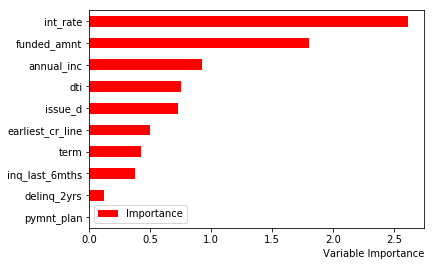

In [85]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index = X_train.columns)
Importance.head(10).sort_values('Importance', axis=0,ascending=True).plot(kind='barh',color='r',)
plt.xlabel('Variable Importance', horizontalalignment='right', position=(1,25))
plt.gca().Legend_ = None

# Estimated Monetary Impact

In [86]:
newdf = df[df.default_ind == 1]
newdf.shape

(46467, 162)

In [87]:
totalfunded = sum(df['funded_amnt'])
print(totalfunded)

12610459125.0


In [88]:
fundedsum = 0

for index, row in newdf.iterrows():
    fundedsum = row['funded_amnt'] + fundedsum
print('Total loss:',fundedsum)

Total loss: 675103675.0


In [89]:
totalloss = fundedsum/totalfunded
print(totalloss)

0.053535217735381224


In [90]:
losswithmodel = fundedsum - (0.02*totalfunded)
print('Total Losses with Decision tree:',losswithmodel)

Total Losses with Decision tree: 422894492.5


In [91]:
savings = fundedsum - losswithmodel
print('Total Savings: ',savings)

Total Savings:  252209182.5


In [92]:
print('Savings percentage:',100*(savings/fundedsum))

Savings percentage: 37.3585853313567
